# 4장. 머신 러닝의 기본 요소(Fundamental Elements of Machine Learning)
★ 참고 링크
https://github.com/gilbutITbook/006975/

https://wikidocs.net/94660

※ 이 장에서 다룰 핵심 내용
* 분류와 회귀 이외의 머신 러닝 형태
* 머신 러닝 모델의 올바른 평가 과정
* 딥러닝을 위한 데이터 전처리
* 특성 공학
* 과대적합 문제 해결
* 머신 러닝 문제를 다루는 일반적인 작업 흐름

※ 머신 러닝에서 아주 중요한 문제인 과대적합(Overfitting)도 직접 보았습니다. 이 장에서는 딥러닝 문제에 도전하고 해결하기 위해 새롭게 얻은 직관을 확고한 개념으로 정립하겠습니다. 모델 평가, 데이터 전처리, 특성 공학, 과대적합 문제 같은 이런 모든 개념을 머신 러닝 문제를 해결하기 위한 7단계 작업 흐름으로 자세하게 정리하겠습니다.

## 4.1 머신 러닝의 네 가지 분류(Four Categories of Machine Learning)
* 이전 예제에서 세 가지 종류의 머신 러닝 문제를 다루었습니다. 이진 분류, 다중 분류, 스칼라 회귀입니다. 이 셋은 모두 지도 학습(supervised learning)의 예입니다. 지도 학습의 목표는 훈련 데이터의 입력과 타깃 사이에 있는 관계를 학습하는 것입니다.
* 지도 학습은 빙산의 일각일 뿐입니다. 전체 머신 러닝은 복잡한 하위 분류를 가진 방대한 분야입니다. 일반적으로 머신 러닝 알고리즘은 다음 절에서 소개하는 4개의 커다른 범주 안에 속합니다.

### 4.1.1 지도 학습(Supervised Learning)
* 지도 학습이 가장 흔한 경우입니다. (종종 사람이 레이블링한) 샘플 데이터가 주어지면 알고 있는 타깃(꼬리표(annotation)라고도 합니다)에 입력 데이터를 매핑하는 방법을 학습합니다. 지금까지 이 책에서 본 4개의 예제는 모두 지도 학습의 고전적인 예입니다.요즘 스포트라이트를 받는 광학 문자 판독, 음성 인식, 이미지 분류, 언어 번역 같은 딥러닝의 거의 모든 애플리케이션이 일반적으로 이 범주에 속합니다.
★ 지도 학습은 대부분 분류(Classification)와 회귀(Regression)로 구성되지만 다음과 같은 특이한 변종도 많습니다.
* 시퀀스 생성(sequence generation): 사진이 주어지면 이를 설명하는 캡션을 생성합니다. 시퀀스 생성은 이따금(시퀀스에 있는 단어나 토큰(token)을 반복적으로 예측하는 것처럼) 일련의 분류 문제로 재구성할 수 있습니다.
* 구문 트리(syntax tree)예측: 문장이 주어지면 분해된 구문 트리를 예측합니다.
* 물체 감지(object detection): 사진이 주어지면 사진 안의 특정 물체 주위에 경계 상자(bounding box)를 그립니다. 이는 (많은 경계 상자 후보가 주어졌을 때 각 상자의 내용을 분류하는) 분류 문제로 표현되거나, 경계 상자의 좌표를 벡터 회귀로 예측하는 회귀와 분류가 결합된 문제로 표현할 수 있습니다.
* 이미지 분할(image segmentaion): 사진이 주어졌을 때 픽셀 단위로 특정 물체에 마스킹(masking)을 합니다.

### 4.1.2 비지도 학습(Unsupervised Learning)
* 머신 러닝은 어떤 타깃도 사용하지 않고 입력 데이터에 대한 흥미로운 변환을 찾습니다. 데이터 시각화, 데이터 압축, 데이터의 노이즈 제거 또는 데이터에 있는 상관관계를 더 잘 이해하기 위해 사용합니다. 비지도 학습(Unsupervised Learning)은 데이터 분석에서 빼놓을 수 없는 요소이며, 종종 지도 학습 문제를 풀기 전에 데이터셋을 잘 이해하기 위해 필수적으로 거치는 단계입니다. 차원 축소(Dimensionality Reduction)와 군집(Clustering)이 비지도 학습에서 잘 알려진 범주입니다.

### 4.1.3 자기 지도 학습(Self-Supervised Learning)
* 자기 지도 학습(Self-Supervised Learning)은 지도 학습의 특별한 경우이지만 별도의 범주로 할 만큼 충분히 다릅니다. 자기 지도 학습은 지도 학습이지만 사람이 만든 레이블을 사용하지 않습니다. 즉 학습 과정에 사람이 개입하지 않는 지도 학습이라고 생각할 수 있습니다. (학습이 무언가에 지도되어야 하므로) 레이블이 여전히 필요하지만 보통 경험적인 알고리즘을(heuristic algorithm)을 사용해서 입력 데이터로부터 생성합니다.
* 예를 들어 오토인코더(AutoEncoder)가 잘 알려진 자기 지도 학습의 예입니다. 여기에서 생성된 타깃은 수정하지 않은 원본 입력입니다. 같은 방식으로 지난 프레임이 주어졌을 때 비디오의 다음 프레임을 예측하는 것이나, 이전 단어가 주어졌을 때 다음 단어를 예측하는 것이 자기 지도 학습의 예입니다(이 경우에는 미래의 입력 데이터로부터 지도되기 때문에 시간에 따른 지도 학습(temporally supervised learning)입니다). 지도 학습(Supervised Learning), 자기 지도 학습(Self-Supervised Learning), 비지도 학습(Unsupervised Learning)의 구분은 가끔 모호할 수 있습니다. 이 범주들은 명확한 경계가 없고 연속적입니다. 자기 지도 학습은 학습 메커니즘과 애플리케이션 측면 중 어디에 중점을 두는지에 따라 지도 학습 또는 비지도 학습으로 재해석 될 수 있습니다.

★ Note: 지도 학습이 광범위한 산업계의 애플리케이션에 적용되어 오늘날 딥러닝의 대부분을 차지하고 있기 때문에 이 책에서는 특히 지도 학습에 집중하겠습니다. 책의 후반부에서 자기 지도 학습에 대해 잠깐 살펴봅시다.

### 4.1.4 강화 학습(Reinforcement Learning)
* 오랫동안 간과되었던 강화 학습(Reinforcement Learning)은 구글 딥마인드(DeepMind)가 아타리(Atari) 게임 플레이를 학습하는 데 성공적으로 적용하면서 최근에 많은 관심을 받기 시작했습니다(그 이후 최고 수준의 바둑 실력을 학습했습니다). 강화 학습에서 에이전트(agent)는 환경에 대한 정보를 받아 보상을 최대화하는 행동을 선택하도록 학습됩니다. 예를 들어 강화 학습으로 훈련된 신경망은 비디오 게임 화면을 입력으로 받고 게임 점수를 최대화하기 위한 게임 내의 행동을 출력할 수 있습니다.
* 현재 강화 학습은 대부분 연구 영역에 속해 있고 게임 이외에 실제적인 성공 사례는 아직 없습니다.하지만 때가 되면 강화 학습이 실제 세상의 많은 애플리케이션을 대체할 것으로 기대하고 있습니다. 이런 애플리케이션에는 자율 주행 자동차, 자원 관리, 교육 등이 있습니다. 아마 그때가 왔거나 이제 곧 올 것입니다.

★ Note <분류(Classification)와 회귀(Regression)에서 사용하는 용어>

분류와 회귀에는 특별한 용어가 많습니다. 이전 예제에서 일부 용어를 보았고 앞으로 이어지는 장들에서 더 많이 등장합니다. 이런 용어들은 머신 러닝에 특화된 구체적인 정의를 가지므로 친숙해져야 합니다.
* 샘플 또는 입력: 모델에 주입될 하나의 데이터 포인트
* 예측 또는 출력: 모델로부터 나오는 값
* 타깃: 정답. 외부 데이터 소스에 근거하여 모델이 완벽하게 예측해야 하는 값
* 예측 오차 또는 손실 값:모델의 예측과 타깃 사이의 거리를 측정한 값
* 클래스: 분류 문제에서 선택할 수 있는 가능한 레이블의 집합. 예를 들어 고양이와 강아지 사진을 분류할 때 클래스는 '고양이'와 '강아지' 2개입니다.
* 레이블: 분류 문제에서 클래스 할당의 구체적인 사례. 예를 들어 사진 #1234에 '강아지' 클래스가 들어 있다고 표시한다면 '강아지'는 사진 #1234의 레이블이 됩니다.
* 참 값(ground-truth) 또는 꼬리표(annotation): 데이터셋에 대한 모든 타깃. 일반적으로 사람에 의해 수집됩니다.
* 이진 분류: 각 입력 샘플이 2개의 배타적인 범주로 구분되는 분류 작업
* 다중 분류: 각 입력 샘플이 2개 이상의 범주로 구분되는 분류 작업. 예를 들어 손글씨 숫자 분류를 말합니다.
* 다중 레이블 분류: 각 입력 샘플이 여러 개의 레이블에 할당될 수 있는 분류 작업. 예를 들어 하나의 이미지에 고양이와 강아지가 모두 들어 있을 때는 '고양이' 레이블과 '강아지' 레이블을 모두 할당해야 합니다. 보통 이미지마다 레이블의 개수는 다릅니다.
* 스칼라 회귀: 타깃이 연속적인 스칼라 값인 작업. 주택 가격 예측이 좋은 예입니다. 각기 다른 타깃 가격이 연속적인 공간을 형성합니다.
* 벡터 회귀: 타깃이 연속적인 값의 집합인 작업. 예를 들어 연속적인 값으로 이루어진 벡터입니다. (이미지에 있는 경계 상자의 좌표 같은) 여러 개의 값에 대한 회귀를 한다면 벡터 회귀입니다.
* 미니 배치 또는 배치: 모델에 의해 동시에 처리되는 소량의 샘플 묶음(일반적으로 8개에서 128개 사이). 샘플 개수는 GPU의 메모리 할당이 용이하도록 2의 거듭제곱으로 하는 경우가 많습니다. 훈련할 때 미니 배치마다 한 번씩 모델의 가중치에 적용할 경사 하강법 업데이트 값을 계산합니다.


## 4.2 머신 러닝 모델 평가
* 3장에서 본 3개의 예제에서 데이터를 훈련 세트(Training Set), 검증 세트(Validation Set), 테스트 세트(Test Set)로 나누었습니다. 훈련에 사용된 동일한 데이터로 모델을 평가하지 않는 이유는 금방 드러났습니다. 몇 번의 에포크(Epoch) 후에 3개의 모델이 모두 **과대적합(Overfitting)**되기 시작했습니다. 즉 훈련 데이터의 성능에 비해 처음 본 데이터에 대한 성능이 좋아지지 않습니다(또는 더 나빠집니다). 반면에 훈련 데이터의 성능은 훈련이 진행될수록 항상 증가됩니다.
* 머신 러닝의 목표는 처음 본 데이터에서 잘 작동하는 일반화된 모델을 얻는 것입니다. 여기에서 과대적합은 주요 장애물입니다. 관측할 수 있는 것만 제어할 수 있으므로 모델의 일반화 성능에 대한 신뢰할 수 있는 측정 방법이 아주 중요합니다. 다음 절에서 과대적합을 완화하고 일반화를 최대화하기 위한 전략을 살펴보겠습니다. 이 절에서는 일반화, 즉 머신 러닝 모델의 성능을 어떻게 측정하는지에 집중합니다.

### 4.2.1 훈련, 검증, 테스트 세트
* 모델 평가의 핵심은 가용한 데이터를 항상 훈련, 검증, 테스트 3개의 세트로 나누는 것입니다. 훈련 세트에서 모델을 훈련하고 검증 세트에서 모델을 평가합니다. 모델을 출시할 준비가 되면 테스트 세트에서 최종적으로 딱 한 번 모델을 테스트합니다.
* 훈련 세트와 테스트 세트 2개를 사용하면 어떨까요? 훈련 세트에서 훈련하고 테스트 세트에서 평가하는 것이죠.
* 이렇게 하지 않는 이유는 모델을 개발할 때 항상 모델의 설정을 튜닝하기 때문입니다. 예를 들어 층의 수난 층의 유닛 수를 선택합니다(이런 파라미터를 네트워크의 가중치와 구분하기 위해 하이퍼파라미터(hyperparameter)라고 부릅니다). 검증 세트에서 모델의 성능을 평가하여 이런 튜닝을 수행합니다. 본질적으로 이런 튜닝도 어떤 파라미터 공간에서 좋은 설정을 찾는 학습입니다. 결국 검증 세트의 성능을 기반으로 모델의 설정을 튜닝하면 검증 세트로 모델을 직접 훈련하지 않더라도 빠르게 검증 세트에 과대적합될 수 있습니다.
* 이 현상의 핵심은 정보 누설(information leak) 개념에 있습니다. 검증 세트의 모델 성능에 기반하여 모델의 하이퍼파라미터를 조정할 때마다 검증 데이터에 관한 정보가 모델로 새는 것입니다. 하나의 파라미터에 대해서 단 한 번만 튜닝한다면 아주 적은 정보가 누설됩니다. 이런 검증 세트로는 모델을 평가할 만합니다. 하지만 한 번 튜닝하고 나서 검증 세트에 평가한 결과를 가지고 다시 모델을 조정하는 과정을 여러 번 반복하면, 검증 세트에 관한 정보를 모델에 아주 많이 노출시키게 됩니다.
* 검증 데이터에 맞추어 최적화했기 때문에 검증 데이터에 의도적으로 잘 수행되는 모델이 만들어집니다. 검증 데이터가 아니고 완전히 새로운 데이터에 대한 성능이 관심 대상이라면 모델을 평가하기 위해 이전에 본 적 없는 완전히 다른 데이터셋을 사용해야 합니다. 바로 테스트 세트입니다. 모델은 간접적으로라도 테스트 세트에 대한 어떤 정보도 얻어서는 안 됩니다. 테스트 세트 성능에 기초하여 튜닝한 모델의 모든 설정은 일반화 성능을 왜곡시킬 것입니다.
* 데이터를 훈련, 검증, 테스트 세트로 나누는 것은 간단해 보일 수 있지만 데이터가 적을 때는 몇 가지 고급 기법을 사용하면 도움이 됩니다. 대표적인 세 가지 평가 방법인 단순 홀드아웃 검증(hold-out validation), K-겹 교차 검증(K-fold cross-validation), 셔플링(shuffling)을 사용한 반복 K-겹 교차 검증(iterated K-fold cross-validation)을 살펴보겠습니다.

**단순 홀드아웃 검증**
* 데이터의 일정량을 테스트 세트로 떼어 놓고, 남은 데이터에서 훈련하고 테스트 세트로 평가합니다. 앞 절에서 설명했듯이 정보 누설을 막기 위해 테스트 세트를 사용해 모델을 튜닝해서는 안 됩니다. 이런 이유로 검증 세트도 따로 떼어 놓아야 합니다.

In [ ]:
import numpy as np
# 홀드아웃 검증 구현 예
# 데이터 로드하기
num_validation_samples = 10000
# 데이터를 섞는 것(셔플링)이 일반적으로 좋습니다.
np.random.shuffle(data)
# 검증 세트를 만듭니다.
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

# 훈련 세트를 만듭니다.
training_data = data[:]

# 훈련 세트에서 모델을 훈련하고 검증 세트로 평가합니다.
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# 여기에서 모델을 튜닝하고,
# 다시 훈련하고, 평가하고, 또 다시 튜닝하고, 훈련하고, 평가하고...
# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 
# 모든 데이터를 사용하여 모델을 다시 훈련시킵니다.
model = get_model()
model.train(np.concatenate([training_data,
                            validation_data]))
# 평가 점수
test_score = model.evaluate(test_data)

* 이 평가 방법은 단순해서 한 가지 단점이 있습니다. 데이터가 적을 때는 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있습니다. 쉽게 이를 확인할 수 있습니다. 다른 난수 초깃값으로 셔플링해서 데이터를 나누었을 때 모델의 성능이 매우 달라지면 바로 이 문제입니다. 다음에 이야기할 K-겹 교차 검증과 반복 K-겹 교차 검증이 이 문제를 해결할 수 있습니다.

**K-겹 교차 검증(K-fold cross-validation)**
* 이 방식에서는 데이터를 동일한 크기를 가진 K개 분할로 나눕니다. 각 분할 i에 대해 남은 K - 1개의 분할로 모델을 훈련하고 분할 i에서 분할을 평가합니다. 최종 점수는 이렇게 얻은 K개의 점수를 평균합니다. 이 방법은 모델의 성능이 데이터 분할에 따라 편차가 클 때 도움이 됩니다. 홀드 아웃 검증처럼 이 방법은 모델의 튜닝에 별개의 검증 세트를 사용하게 됩니다.

In [ ]:
# K-겹 교차 검증 구현 예
# K-겹 교차 검증은 사이킷런(Scikit-learn)의 cross_validate() 함수를 사용하여
# 쉽게 구할 수 있습니다. 이 함수를 사용하려면 케라스 모델을 사이킷런과 호환되도록
# KerasClassifier나 KerasRegressor 클래스로 모델을 감싸야 합니다.
k = 4
num_validation_samples = len(data) // k
# 데이터를 섞는 것이 일반적으로 좋습니다.
np.random.shuffle(data)

validation_scores = []
for fold in range(k):
    # 검증 데이터 부분을 선택합니다.
    validation_data = data[num_validation_samples * fold:
      num_validation_samples * (fold + 1)]
    # 남은 데이터를 훈련 데이터로 사용합니다.
    # 리스트에서 '+' 연산자는 두 리스트를 더하는 것이 아니고 연결합니다.
    training_data = data[:num_validation_samples * fold] +
      data[num_validation_samples * (fold + 1):]
    # 훈련되지 않은 새로운 모델을 만듭니다.
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
# 검증 점수: K개 폴드의 검증 점수 평균    
validation_score = np.average(validation_scores)
# 테스트 데이터를 제외한 전체 데이터로 최종 모델을 훈련합니다.
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

**셔플링을 사용한 반복 K-겹 교차 검증(Iterated K-fold cross validation using shuffling)**
* 이 방법은 비교적 가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용합니다. 케글 경연에서는 이 방법이 아주 크게 도움이 됩니다. 이 방법은 K-겹 교차 검증을 여러 번 적용하되 K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞습니다. 최종 점수는 모든 K-겹 교차 검증을 실행해서 얻은 점수의 평균이 됩니다. 결국 P X K개(P는 반복 횟수)의 모델을 훈련하고 평가하므로 비용이 매우 많이 듭니다.

## 4.3 데이터 전처리, 특성 공학, 특성 학습

### 4.3.1 신경망을 위한 데이터 전처리
* 데이터 전처리 목적은 주어진 원본 데이터를 신경망에 적용하기 쉽도록 만드는 것입니다. 벡터화(vectorization), 정규화(normalization), 누락된 값 다루기, 특성 추출 등이 포함됩니다.

**벡터화(vectorization)**
* 신경망에서 모든 입력과 타깃은 부동 소수 데이터로 이루어진 텐서(tensor)여야 합니다(또는 특정 경우에 정수로 이루어진 텐서입니다). 사운드, 이미지, 텍스트 등 처리해야 할 것이 무엇이든지 먼저 텐서로 변환해야 합니다. 이 단계를 데이터 벡터화(data vectorization)라고 합니다.
* 예를 들어 이전에 나온 2개의 텍스트 분류 예에서 텍스트를 (단어 시퀀스를 의미하는) 정수 리스트로 변환했습니다. 그다음 원-핫 인코딩을 사용하여 float32 타입의 데이터로 이루어진 텐서로 바꾸었습니다. 숫자 이미지 분류와 주택 가격 예측의 예에서는 이미 데이터가 벡터 형태로 주어졌으므로 이 단계를 건너뛰었습니다.

**값 정규화(Normalize values)**

* 숫자 이미지 분류 예에서 이미지 데이터를 그레이스케일 인코딩인 `0~255` 사이의 정수로 인코딩했습니다. 이 데이터를 네트워크에 주입하기 전에 float32 타입으로 변경하고 255로 나누어서 최종적으로 `0~1` 사이의 부동 소수 값으로 만들었습니다. 주택 가격을 예측할 때는 특성들의 범위가 제각각이었습니다. 어떤 특성은 작은 부동 소수 값이고 다른 특성은 매우 큰 정수 값을 가졌습니다. 이 데이터를 네트워크에 주입하기 전에 각 특성을 독립적으로 정규화하여 평균이 0이고 표준 편차가 1이 되도록 만들었습니다.
* 일반적으로 비교적 큰 값(예를 들어 네트워크의 가중치 초깃값보다 훨씬 큰 여러 자릿수를 가진 정수)이나 균일하지 않은 데이터(예를 들어 한 특성의 범위는 `0~1`이고 다른 특성은 `100~200`인 데이터)를 신경망에 주입하는 것은 위험합니다. 이렇게 하면 업데이트할 그래디언트가 커져 네트워크가 수렴하는 것을 방해합니다. 네트워크를 쉽게 학습시키려면 데이터가 다음 특징을 따라야 합니다.
    * 작은 값을 취합니다. 일반적으로 대부분의 값이 0~1 사이여야 합니다.
    * 균일해야 합니다. 즉 모든 특성이 대체로 비슷한 범위를 가져야 합니다.

* 추가적으로 다음에 나오는 엄격한 정규화 방법은 꼭 필수적이지는 않지만(예를 들어 숫자 이미지 분류 예에서는 사용하지 않았습니다) 자주 사용되고 도움이 될 수 있습니다.
    * 각 특성별로 평균이 0이 되도록 정규화합니다.
    * 각 특성별로 표준 편차가 1이 되도록 정규화합니다.
* 넘파이 배열에서 하는 방법은 간단합니다.
    * x -= x.mean(axis=0)
    * x /= x.std(axis=0)

## 4.4 과대적합과 과소적합(Overfitting and Underfitting)

* 머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화(Optimization)는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면에 일반화(generalization)는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지 의미합니다. 물론 모델을 만드는 목적은 좋은 일반환 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.
* 훈련 초기에 최적화와 일반화는 상호 연관되어 있습니다. 훈련 데이터의 손실이 낮아질수록 테스트 데이터의 손실도 낮아집니다. 이런 상황이 발생할 때 모델이 과소적합(underfitting) 되었다고 말합니다. 모델의 성능이 계속 발전될 여지가 있습니다. 즉 네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못했습니다.
* 하지만 훈련 데이터에 여러 번 반복 학습하고 나면 어느 시점부터 일반화 성능이 더 이상 높아지지 않습니다. 검증 세트의 성능이 멈추고 감소되기 시작합니다. 즉 모델이 과대적합되기 시작합니다. 이는 훈련 데이터에 특화된 패턴을 학습하기 시작했다는 의미입니다. 이 패턴은 새로운 데이터와 연관성이 적어 잘못된 판단을 하게 만듭니다.

### 4.4.1 네트워크 크기 축소
* 과대적합(Overfitting)을 막는 가장 단순한 방법은 모델의 크기, 즉 모델에 있는 학습 파라미터의 수를 줄이는 것입니다. 파라미터의 수는 층의 수와 각 층의 유닛 수에 의해 결정됩니다. 딥러닝에서 모델에 있는 학습 파라미터의 수를 종종 모델의 용량(capacity)이라고 말합니다. 당연하게 파라미터가 많은 모델이 기억 용량이 더 많습니다. 훈련 샘플과 타깃 사이를 딕셔너리 같은 일대일 매핑으로 완벽하게 학습할 수도 있습니다. 이런 매핑은 일반화 능력이 없습니다. 예를 들어 50만 개의 이진 파라미터가 있는 모델은 MNIST 훈련 세트의 숫자 이미지 클래스를 모두 쉽게 학습할 수 있습니다.
* 5만 개의 숫자 이미지 하나마다 10개의 이진 파라미터만 있으면 됩니다. 하지만 이런 모델은 새로운 숫자 샘플을 분류하는 용도로는 쓸모가 없습니다. 항상 유념해야 할 것은 딥러닝 모델은 훈련 데이터에 잘 맞추려는 경향이 있다는 점입니다. 하지만 진짜 문제는 최적화가 아니고 일반화입니다.
* 다른 한편으로 네트워크가 기억 용량에 제한이 있다면 이런 매핑을 쉽게 학습하지 못할 것입니다. 따라서 손실을 최소화하기 위해 타깃에 대한 예측 성능을 가진 압축된 표현을 학습해야 합니다. 정확히 이런 표현이 우리 관심 대상입니다. 동시에 기억해야 할 것은 과소적합되지 않도록 충분한 파라미터를 가진 모델을 사용해야 한다는 점입니다. 모델의 기억 용량이 부족해서는 안 됩니다. 너무 많은 용량과 충분하지 않은 용량 사이의 절충점을 찾아야 합니다.
* 안타깝지만 알맞은 층의 수나 각 층의 유닛 수를 결정할 수 있는 마법 같은 공식은 없습니다. 데이터에 알맞은 모델 크기를 찾으려면 각기 다른 구조를 평가해 보아야 합니다. 적절한 모델 크기를 찾는 일반적인 작업 흐름은 비교적 적은 수의 층과 파라미터로 시작합니다. 그다음 검증 손실이 감소되기 시작할 때까지 층이나 유닛의 수를 늘리는 것입니다.

※ 3장 5절에 있는 코드를 사용해 데이터를 준비합니다.

In [1]:
# 데이터 준비
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\wnstj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\wnstj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [2]:
# 원본 모델(Original Model)
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

* 더 작은 네트워크로 바꾸어 보죠.

In [3]:
from keras import models
from keras import layers
# 작은 용량의 모델(smaller model)
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [4]:
original_model_hist = original_model.fit(x_train, y_train,
                                         epochs=20,
                                         batch_size=512,
                                         validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 26s 484ms/step - loss: 0.5716 - acc: 0.7476 - val_loss: 0.3678 - val_acc: 0.8664
Epoch 2/20
49/49 [==============================] - 6s 133ms/step - loss: 0.2930 - acc: 0.9012 - val_loss: 0.3063 - val_acc: 0.8771
Epoch 3/20
49/49 [==============================] - 4s 91ms/step - loss: 0.2114 - acc: 0.9258 - val_loss: 0.2807 - val_acc: 0.8894
Epoch 4/20
49/49 [==============================] - 5s 96ms/step - loss: 0.1684 - acc: 0.9448 - val_loss: 0.2961 - val_acc: 0.8824
Epoch 5/20
49/49 [==============================] - 4s 76ms/step - loss: 0.1455 - acc: 0.9511 - val_loss: 0.3198 - val_acc: 0.8774
Epoch 6/20
49/49 [==============================] - 4s 78ms/step - loss: 0.1218 - acc: 0.9617 - val_loss: 0.3292 - val_acc: 0.8756
Epoch 7/20
49/49 [==============================] - 4s 77ms/step - loss: 0.1091 - acc: 0.9650 - val_loss: 0.3467 - val_acc: 0.8742
Epoch 8/20
49/49 [==============================] - 4s 77ms/step - loss: 0.0947 

In [22]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 20s 374ms/step - loss: 0.5772 - acc: 0.7533 - val_loss: 0.3941 - val_acc: 0.8729
Epoch 2/20
49/49 [==============================] - 5s 108ms/step - loss: 0.3309 - acc: 0.9003 - val_loss: 0.3197 - val_acc: 0.8830
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2491 - acc: 0.9187 - val_loss: 0.2864 - val_acc: 0.8907
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2011 - acc: 0.9330 - val_loss: 0.2787 - val_acc: 0.8898
Epoch 5/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1747 - acc: 0.9434 - val_loss: 0.2826 - val_acc: 0.8875
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1508 - acc: 0.9494 - val_loss: 0.2896 - val_acc: 0.8861
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1398 - acc: 0.9544 - val_loss: 0.3028 - val_acc: 0.8830
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1229 

In [24]:
epochs = range(1, 21)
original_model_val_loss = original_model_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

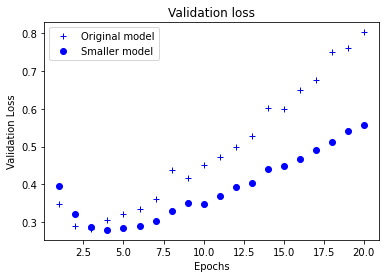

In [26]:
import matplotlib.pyplot as plt
# 'b+' 는 파란색 덧셈 기호를 의미합니다.
plt.plot(epochs, original_model_val_loss, 'b+', label='Original model')
# 'bo' 는 파란색 점을 의미합니다.
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

[검증 손실에 대한 모델 용량의 효과: 작은 용량의 모델과 비교(Effectiveness of model capacity about validation losses: compared to smaller capacity models)]

* 여기서 볼 수 있듯이 작은 네크워크가 기본 네트워크보다 더 나중에 과대적합되기 시작했습니다(네 번째 에포크가 아니라 여섯 번째 에포크에서). 과대적합이 시작되었을때 성능이 더 천천히 감소했습니다.
* 이번에는 문제에 필요한 것보다 훨씬 더 많은 용량을 가진 네트워크를 비교해 보겠습니다.

In [5]:
# 큰 용량의 모델(Bigger model)

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [6]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 77s 2s/step - loss: 0.7743 - acc: 0.7015 - val_loss: 0.2818 - val_acc: 0.8893
Epoch 2/20
49/49 [==============================] - 66s 1s/step - loss: 0.2317 - acc: 0.9116 - val_loss: 0.3443 - val_acc: 0.8687
Epoch 3/20
49/49 [==============================] - 94s 2s/step - loss: 0.1245 - acc: 0.9523 - val_loss: 0.3856 - val_acc: 0.8792
Epoch 4/20
49/49 [==============================] - 86s 2s/step - loss: 0.0354 - acc: 0.9908 - val_loss: 0.4202 - val_acc: 0.8816
Epoch 5/20
49/49 [==============================] - 77s 2s/step - loss: 0.0049 - acc: 0.9995 - val_loss: 2.2745 - val_acc: 0.6778
Epoch 6/20
49/49 [==============================] - 71s 1s/step - loss: 0.0795 - acc: 0.9803 - val_loss: 0.6339 - val_acc: 0.8821
Epoch 7/20
49/49 [==============================] - 77s 2s/step - loss: 0.0627 - acc: 0.9948 - val_loss: 0.5175 - val_acc: 0.8809
Epoch 8/20
49/49 [==============================] - 74s 2s/step - loss: 3.7561e-04 - acc: 

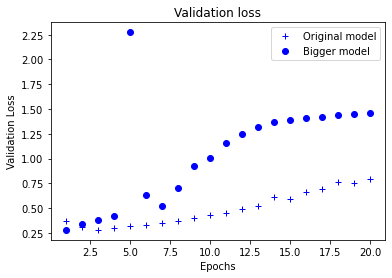

In [8]:
epochs = range(1, 21)
original_model_val_loss = original_model_hist.history['val_loss']
bigger_model_val_loss = bigger_model_hist.history['val_loss']

import matplotlib.pyplot as plt
# 'b+' 는 파란색 덧셈 기호를 의미합니다.
plt.plot(epochs, original_model_val_loss, 'b+', label='Original model')
# 'bo' 는 파란색 점을 의미합니다.
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

[검증 손실에 대한 모델 용량의 효과: 큰 용량의 모델과 비교(Effectiveness of model capacity about validation losses: compared to bigger capacity models)]

* 용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해집니다. 검증 손실도 매우 불안정합니다.
* 다음은 두 네트워크의 훈련 손실입니다.

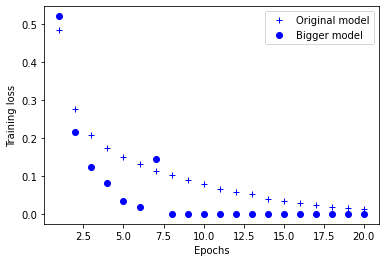

In [11]:
original_model_train_loss = original_model_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_model_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

### 4.4.2 가중치 규제 추가(add weight regularization)


* 오캄의 면도날(Occam's razor) 이론을 알고 있을지 모르겠습니다. 어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정이 필요한 간다한 설명이 옳을 것이라는 이론입니다. 이 개념은 신경망으로 학습되는 모델에도 적용됩니다. 어떤 훈련 데이터와 네트워크 구조가 주어졌을 때 데이터를 설명할 수 있는 가중치 값의 집합은 여러 개(여러 개의 모델)입니다. 간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높습니다.
* 여기에서 간단한 모델은 파라미터 값 분포의 엔트로피가 작은 모델입니다(또는 앞 절에서 본 것처럼 적은 수의 파라미터를 가진 모델입니다). 그러므로 과대적합을 완화하기 위한 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것입니다. 가중치 값의 분포가 더 균일하게 됩니다. 이를 **가중치 규제(weight regularization)**라고 하며, 네트워크의 손실 함수에 큰 가중치에 연관된 비용을 추가합니다. 두 가지 형태의 비용이 있습니다.
    * L1 규제: 가중치의 절댓값에 비례하는 비용이 추가됩니다(가중치의 L1 노름(norm)).
    * L2 규제: 가중치의 제곱에 비례하는 비용이 추가됩니다(가중치의 L2 노름, 유클리디안 노름(Euclidean norm)이라고도 부릅니다.). L2 규제는 신경망에서 **가중치 감쇠(weight decay)**라고도 부릅니다. 이름이 다르지만 혼동하지 마세요. 가중치 감쇠는 수학적으로 L2 규제와 동일합니다.
* 케라스에서 가중치 규제 객체를 층의 키워드 매개변수로 전달하여 가중치 규제를 추가할 수 있습니다. 영화 리뷰 분류 네트워크에 L2 가중치 규제를 추가해 보죠.

In [34]:
# 모델에 L2 가중치 추가하기
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

* `l2(0.001)` 는 가중치 행렬의 모든 원소를 제곱하고 `0.001`을 곱하여 네트워크의 전체 손실에 더해진다는 의미입니다. 이 페널티 항은 훈련할 때만 추가됩니다. 이 네트워크의 손실은 테스트보다 훈련할 때 더 높을 것입니다.
* L2 규제 페널티의 효과를 확인해 보죠.

In [36]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 22s 394ms/step - loss: 0.5849 - acc: 0.7438 - val_loss: 0.3869 - val_acc: 0.8714
Epoch 2/20
49/49 [==============================] - 5s 95ms/step - loss: 0.3230 - acc: 0.9055 - val_loss: 0.3451 - val_acc: 0.8825
Epoch 3/20
49/49 [==============================] - 3s 62ms/step - loss: 0.2700 - acc: 0.9230 - val_loss: 0.3344 - val_acc: 0.8874
Epoch 4/20
49/49 [==============================] - 3s 55ms/step - loss: 0.2454 - acc: 0.9323 - val_loss: 0.3386 - val_acc: 0.8849
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2267 - acc: 0.9389 - val_loss: 0.3429 - val_acc: 0.8851
Epoch 6/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2180 - acc: 0.9436 - val_loss: 0.3989 - val_acc: 0.8651
Epoch 7/20
49/49 [==============================] - 2s 51ms/step - loss: 0.2162 - acc: 0.9434 - val_loss: 0.3648 - val_acc: 0.8777
Epoch 8/20
49/49 [==============================] - 3s 55ms/step - loss: 0.2055 -

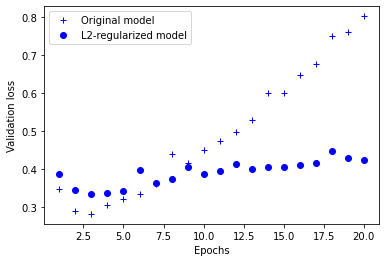

In [38]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_model_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

[검증 손실에 대한 L2 가중치 규제의 효과(Effectiveness of L2 weight regularization about validation loss)]



In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'